In [1]:
#import pandas
import pandas as pd
import matplotlib as plot
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from pandas.plotting import register_matplotlib_converters
import numpy as np
register_matplotlib_converters()
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

#get data
def GetData(fileName):
    return pd.read_csv(fileName, header=0, parse_dates=[0], index_col=0)

def StartARIMAForecasting(Actual, P, D, Q):
	model = ARIMA(Actual, order=(P, D, Q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction

#read time series from the exchange.csv file 
exchangeRatesSeries = GetData('exchange.csv')

#view top 10 records
exchangeRatesSeries.tail(10)

,GBP/USD Close
Date,
2018-07-05,46.26
2018-07-06,46.55
2018-07-09,46.87
2018-07-10,47.61
2018-07-11,47.98
2018-07-12,48.59
2018-07-13,48.56
2018-07-16,48.56
2018-07-17,48.08


In [2]:
exchangeRatesSeries.describe()

,GBP/USD Close
count,5100.000000
mean,89.732223
std,63.037321
min,17.040000
25%,45.965000
50%,73.315500
75%,94.187500
max,250.280000


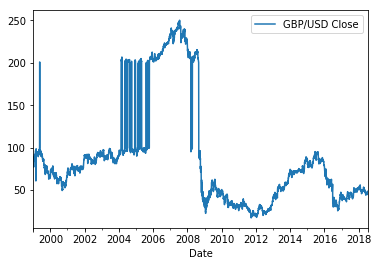

In [3]:
exchangeRatesSeries.plot()

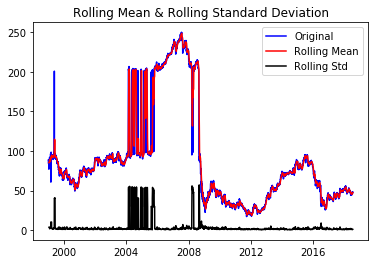

In [4]:
rolling_mean = exchangeRatesSeries.rolling(window = 12).mean()
rolling_std = exchangeRatesSeries.rolling(window = 12).std()
plt.plot(exchangeRatesSeries, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CBB844ABC8>]],
      dtype=object)

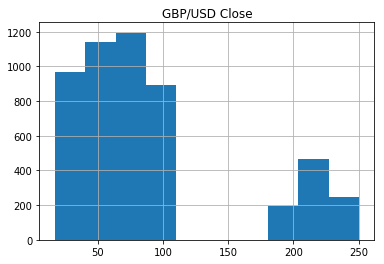

In [5]:
exchangeRatesSeries.hist()

In [6]:
result = adfuller(exchangeRatesSeries['GBP/USD Close'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))
    

ADF Statistic: -1.9670303619953895
p-value: 0.3012135432413925
Critical Values:
	1%: -3.431641475830511
	5%: -2.86211069430083
	10%: -2.5670737809871405


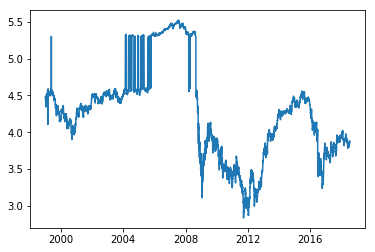

In [7]:
df_log = np.log(exchangeRatesSeries)
plt.plot(df_log);

In [8]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['GBP/USD Close'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
    

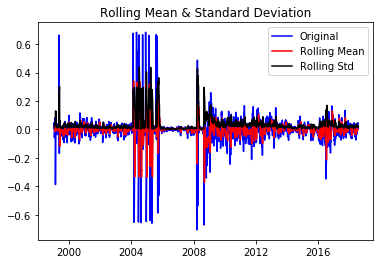

ADF Statistic: -13.312375885846691
p-value: 6.706566568643378e-25
Critical Values:
	1%: -3.4316442875927113
	5%: -2.86211193652888
	10%: -2.56707444227249


In [9]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

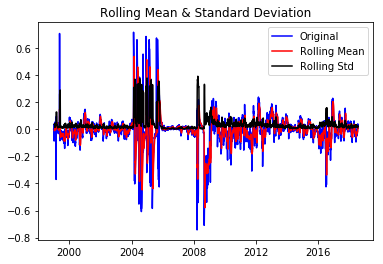

ADF Statistic: -9.703463709399822
p-value: 1.0570292930453745e-16
Critical Values:
	1%: -3.4316402017914016
	5%: -2.8621101314338127
	10%: -2.567073481351634


In [10]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

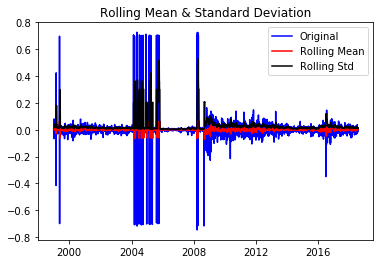

ADF Statistic: -17.133467930731697
p-value: 7.123726325288954e-30
Critical Values:
	1%: -3.4316402017914016
	5%: -2.8621101314338127
	10%: -2.567073481351634


In [11]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

C:\Users\mksta\anaconda3\envs\pyvizenv\envs\pyviz2\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\mksta\anaconda3\envs\pyvizenv\envs\pyviz2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency i

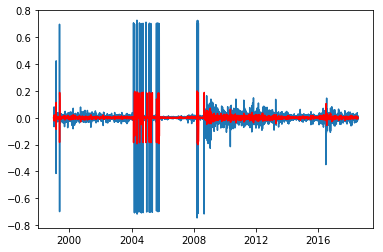

In [12]:
decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red');

In [13]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['GBP/USD Close'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
#plt.plot(exchangeRatesSeries)
#plt.plot(predictions_ARIMA)
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:        D.GBP/USD Close   No. Observations:                 5099
Model:                 ARIMA(2, 1, 2)   Log Likelihood                6434.121
Method:                       css-mle   S.D. of innovations              0.069
Date:                Sun, 24 Apr 2022   AIC                         -12856.242
Time:                        13:50:31   BIC                         -12817.021
Sample:                    01-01-1999   HQIC                        -12842.509
                         - 07-18-2018                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0001      0.001     -0.182      0.855      -0.001       0.001
ar.L1.D.GBP/USD Close    -0.3588      0.080     -4.469      0.000      -0.516      -0.201
ar.L2.D.

In [14]:
exchangeRatesSeries.tail(1)

,GBP/USD Close
Date,
2018-07-18,47.4


In [18]:
results.predict(start=5095, end=5115, dynamic=True)


2018-07-12   -0.005117
2018-07-13   -0.000205
2018-07-16    0.000780
2018-07-17   -0.000429
2018-07-18   -0.000167
2018-07-19   -0.000051
2018-07-20   -0.000138
2018-07-23   -0.000127
2018-07-24   -0.000116
2018-07-25   -0.000122
2018-07-26   -0.000122
2018-07-27   -0.000121
2018-07-30   -0.000121
2018-07-31   -0.000121
2018-08-01   -0.000121
2018-08-02   -0.000121
2018-08-03   -0.000121
2018-08-06   -0.000121
2018-08-07   -0.000121
2018-08-08   -0.000121
2018-08-09   -0.000121
Freq: B, dtype: float64

In [90]:
len(exchangeRatesSeries)
#results.plot_predict(1,30)

5100

C:\Users\mksta\anaconda3\envs\pyvizenv\envs\pyviz2\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


<Figure size 1440x720 with 0 Axes>

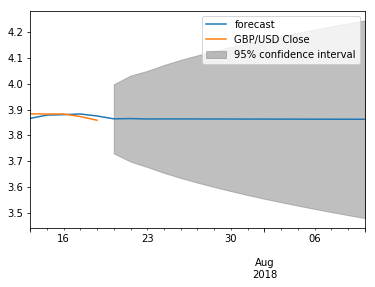

In [19]:
fig = plt.figure(figsize=(20, 10))
fig = results.plot_predict(5095,5115);
fig.show()

AttributeError: 'ARIMAResults' object has no attribute 'plot_diagnostics'

<Figure size 1152x648 with 0 Axes>

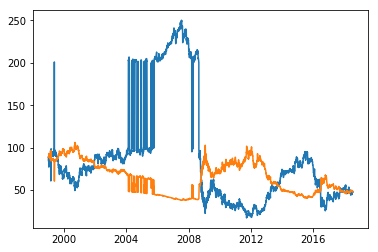

In [23]:
# multi-step out-of-sample forecast
start_index = len(exchangeRatesSeries)
end_index = start_index + 10
forecast = results.predict(start=start_index, end=end_index)
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['GBP/USD Close'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(exchangeRatesSeries)
plt.plot(predictions_ARIMA)



In [24]:
#Get exchange rates
ActualData = exchangeRatesSeries
#Size of exchange rates
NumberOfElements = len(ActualData)

#Use 70% of data as training, rest 30% to Test model
TrainingSize = int(NumberOfElements * 0.7)
TrainingData = ActualData[0:TrainingSize]
TestData = ActualData[TrainingSize:NumberOfElements]

#new arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = list()


#in a for loop, predict values using ARIMA model
for timepoint in range(len(TestData)):
	ActualValue =  TestData[timepoint]
	#forcast value
	Prediction = StartARIMAForecasting(Actual, 1,0,0)    
	print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
	#add it in the list
	Predictions.append(Prediction)
	Actual.append(ActualValue)

#Print MSE to see how good the model is
Error = mean_squared_error(TestData, Predictions)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)
# plot
pyplot.plot(TestData)
pyplot.plot(Predictions, color='red')
pyplot.show()

KeyError: 0